In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score,silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [2]:
image_dir = "flower_images"
all_images = []
numberOffiles = 0
for filename in os.listdir(image_dir):
    if filename.lower().endswith((".png")):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype(np.float32) / 255.0
        img = np.asarray(img)
        img = np.expand_dims(img, axis=0)
        all_images.append(img)
        numberOffiles += 1

print("numberOffiles = ", numberOffiles)

numberOffiles =  210


In [3]:
base_model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))

In [4]:
features = []
for i in range(210):
    feature = preprocess_input(all_images[i])
    feature = base_model.predict(feature)
    features.append(feature)
features = np.array(features)    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━

In [5]:
features = features.reshape((210, 25088))
features = normalize(features)
features.shape

(210, 25088)

In [6]:
df = pd.read_csv('flower_images/flower_labels.csv')
trueLabels = df.iloc[:, -1].to_numpy().flatten()
trueLabels.shape

(210,)

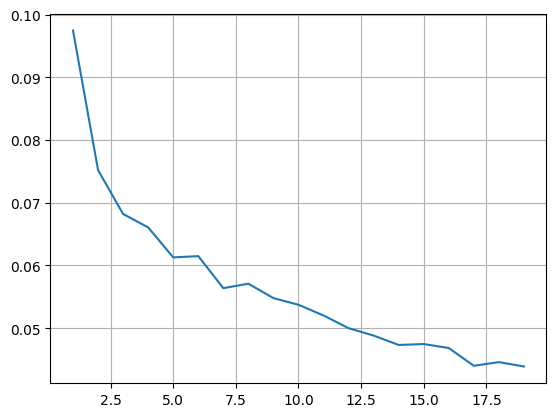

In [7]:
inertias = []
for k in range(1, 20):
    model = KMeans(n_clusters=k)
    model.fit(features)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(1, 20), inertias)
plt.grid()


In [8]:
model = KMeans(n_clusters=10)
model.fit(features)
print("homogeneity_score : ", homogeneity_score(trueLabels, model.labels_))
print("silhouette_score : ", silhouette_score(features, model.labels_))

homogeneity_score :  0.17168809434735618
silhouette_score :  0.057563767


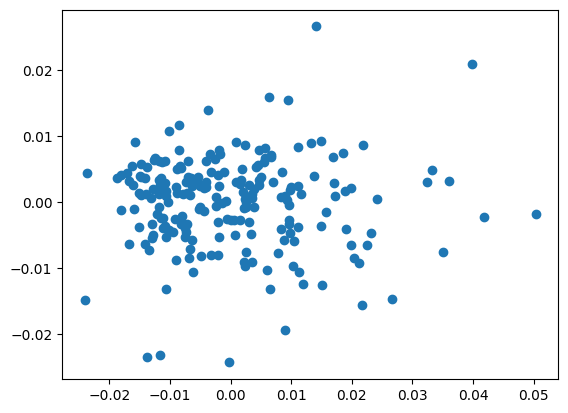

In [9]:
reduced_feature = PCA(n_components=2).fit_transform(features)
plt.scatter(reduced_feature[:, 0], reduced_feature[:, 1])

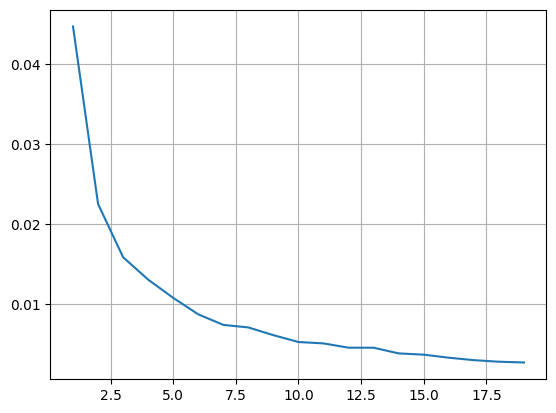

In [10]:
inertias = []
for k in range(1, 20):
    model = KMeans(n_clusters=k)
    model.fit(reduced_feature)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(1, 20), inertias)
plt.grid()


In [11]:
model = KMeans(n_clusters=4)
model.fit(reduced_feature)
print("homogeneity_score : ", homogeneity_score(trueLabels, model.labels_))
print("silhouette_score : ", silhouette_score(reduced_feature, model.labels_))

homogeneity_score :  0.04483652804627579
silhouette_score :  0.39280024


In [12]:
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from sklearn.cluster import KMeans

# Load the VGG16 model
model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

# Function to extract features using VGG16 model
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Directory containing the PNG files
directory = 'flower_images'

# List to store the features
features_list = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img_path = os.path.join(directory, filename)
        features = extract_features(img_path, model)
        features_list.append(features)

# Convert features list to numpy array
X = np.array(features_list)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━

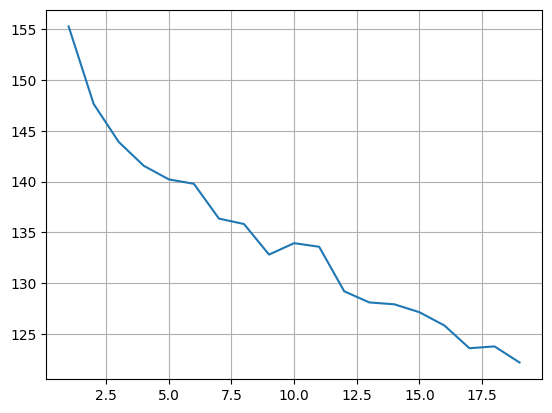

In [22]:
X = normalize(X)
inertias = []
for k in range(1, 20):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(1, 20), inertias)
plt.grid()

In [27]:
model = KMeans(n_clusters=9)
model.fit(X)
print("homogeneity_score : ", homogeneity_score(trueLabels, model.labels_))
print("silhouette_score : ", silhouette_score(X, model.labels_))

homogeneity_score :  0.48939487801017517
silhouette_score :  0.02033495111688933


In [15]:
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the VGG16 model
model = VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False)

# Function to extract features using VGG16 model
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Directory containing the PNG files
directory = 'flower_images'

# List to store the features
features_list = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img_path = os.path.join(directory, filename)
        features = extract_features(img_path, model)
        features_list.append(features)

# Convert features list to numpy array
X = np.array(normalize(features_list))

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

In [16]:
X_pca.shape

(210, 2)

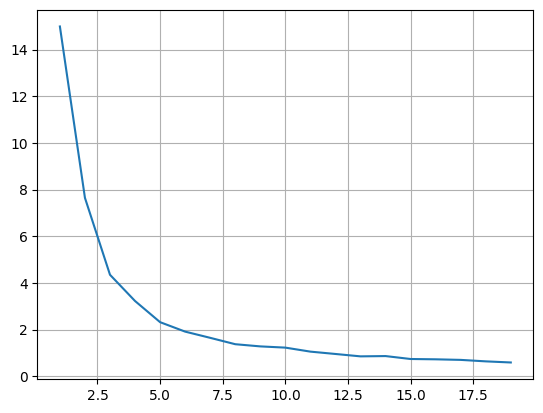

In [17]:
inertias = []
for k in range(1, 20):
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    inertias.append(model.inertia_)

plt.figure()
plt.plot(np.arange(1, 20), inertias)
plt.grid()

In [21]:
model = KMeans(n_clusters=10)
model.fit(X_pca)
print("homogeneity_score : ", homogeneity_score(trueLabels, model.labels_))
print("silhouette_score : ", silhouette_score(X_pca, model.labels_))

homogeneity_score :  0.49860380735106313
silhouette_score :  0.37037289655727235
